In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize, spatial
import os
import urllib

import frigidum

from frigidum.examples import tsp

In [9]:
cities = 'pcb442.tsp'
with open(cities as input_file:
    data = input_file.readlines()[6:-1]
data = [line.strip() for line in data]
data = [[line.split(' ')[1].strip(), line.split(' ')[2].strip()] for line in data]
data = np.array(data, dtype=float)
data = data[0:200]
A = spatial.distance.squareform(spatial.distance.pdist(data))


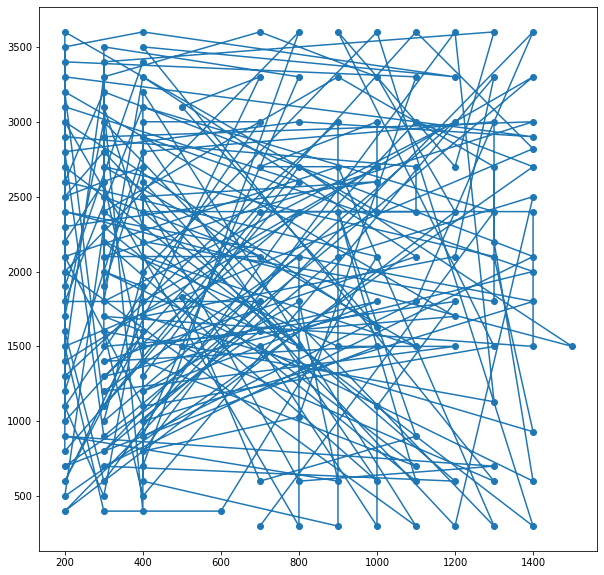

In [13]:
a0 = np.arange(0, data.shape[0])
np.random.seed(42)
np.random.shuffle(a0)
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][a0], data[:, 1][a0], )
plt.plot(data[:, 0][a0], data[:, 1][a0], )


In [ ]:
27029.0422

In [21]:
def rand_start():
    random_guess = np.arange(0, data.shape[0])
    np.random.seed(42)
    np.random.shuffle(random_guess)
    return random_guess
opt = frigidum.sa(random_start=rand_start,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**3,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing=None)

T: 0.001, M: 0.00, O_min: 23426.7610, O_current: 23426.7610: 100%|██████████| 166/166 [03:30<00:00,  1.27s/cooling]

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.065101
   euclidian_nuke_and_fix           : 0.053329
   route_bomb_and_fix               : 0.072507
   route_nuke_and_fix               : 0.057519
   random_disconnect_vertices_and_  : 0.003053
---
(Local) Minimum Objective Value Found: 
   23426.76103895


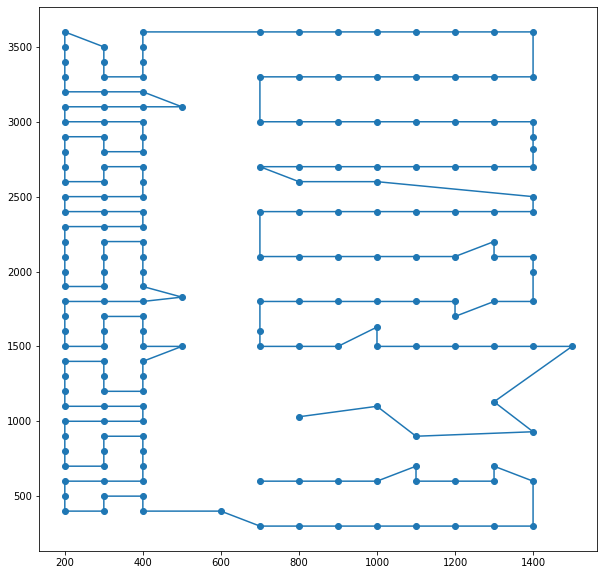

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][opt[0]], data[:, 1][opt[0]])
plt.plot(data[:, 0][opt[0]], data[:, 1][opt[0]])